In [25]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
train_set = torchvision.datasets.FashionMNIST(root = ".", train=True,
download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False,
download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
# Fix the seed to be able to get the same randomness across runs and
# hence reproducible outcomes
torch.manual_seed(0)

Label is: 3
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


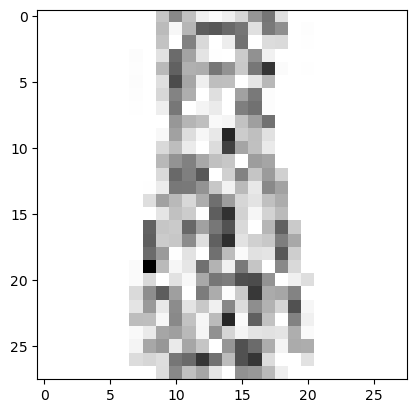

In [27]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

2. Create and train a Convolutional Neural Network corresponding to the following architecture
    1. Input image size: 28 × 28 × 1 (height × width × number of channels).
    2. First convolutional layer: Kernel size (5 × 5), Stride size (1 × 1) and 32 output channels.
       Activation function.
    3. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
    4. Second convolutional layer: Kernel size (5×5), Stride size (1 × 1) and 64 output channels.
       Activation function.
    5. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
    6. First fully-connected layer with input size being the output size of max pooling layer in 5.
       (flattened, i.e. 1024) and output size 1024. Activation function.
    7. Second fully-connected layer with input size being the output size of fully connected layer in
    6. (i.e. 1024) and output size 256. Activation function.
    8. Output layer with input size being the output size of fully-connected layer in 7. (i.e. 256)
       and output size 10
   For training, initialise your weights using the Xavier Uniform initialisation, use ReLU as the
   activation function, a learning rate of 0.1 with the SGD optimiser. You will train your neural
   network for 30 epochs. In your report, provide the following: (a) final (train and test) accuracy
   obtained; (b) plot of the accuracy on the training and test sets per each epoch, comment on the
   speed of performance changes across epochs; (c) plot of the train loss per epoch (total sum of
   per batch losses for each epoch) and comment on the speed of decrease.

In [28]:
# CNN implementation
# Reference of the code is taken from lab 7
class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    
    # Sequential container to run layers sequentially
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5, stride = 1), nn.ReLU(), nn.MaxPool2d(2, stride = 2))
    # Sequential container to run layers sequentially
    #the activation function used is ReLU
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(), nn.Linear(256, 10))
   
  def forward(self, x):  
    # pass input via the CNN layers
    x = self.cnn_model(x)
    
    x =x.view(x.size(0), -1)
    
    # pass input via the fully-connected layers
    x = self.fc_model(x)
    
    return x

In [29]:
# Reference of the code is taken from lab 7
def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader: 
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [30]:
# Reference of the code is taken from lab 7
#weights are initialise using the Xavier Uniform initialisation
def weights_init(m):
    # initialise both linear and convolutional layers
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)

In [31]:
# Reference of the code is taken from lab 7
device = torch.device("cuda:0")
#learning rate of 0.1
alpha = 0.1
net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader, 0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 1028.2146048918366, train accuracy: 86.83166666666666, test accuracy:85.65
Epoch 2: loss: 626.8853912577033, train accuracy: 89.67, test accuracy:88.17
Epoch 3: loss: 538.0138736590743, train accuracy: 90.50833333333334, test accuracy:88.38
Epoch 4: loss: 480.9040214335546, train accuracy: 91.2, test accuracy:89.34
Epoch 5: loss: 433.57323004398495, train accuracy: 92.665, test accuracy:90.31
Epoch 6: loss: 393.4010781869292, train accuracy: 93.05, test accuracy:89.8
Epoch 7: loss: 356.50378303136677, train accuracy: 93.16333333333333, test accuracy:89.9
Epoch 8: loss: 326.36903487332165, train accuracy: 93.3, test accuracy:89.66
Epoch 9: loss: 295.1598184448667, train accuracy: 94.84833333333333, test accuracy:90.75
Epoch 10: loss: 265.47128625167534, train accuracy: 95.76166666666667, test accuracy:90.77
Epoch 11: loss: 239.0780538956169, train accuracy: 96.04, test accuracy:91.05
Epoch 12: loss: 214.65929160267115, train accuracy: 96.29, test accuracy:90.73
Epoch 13: 

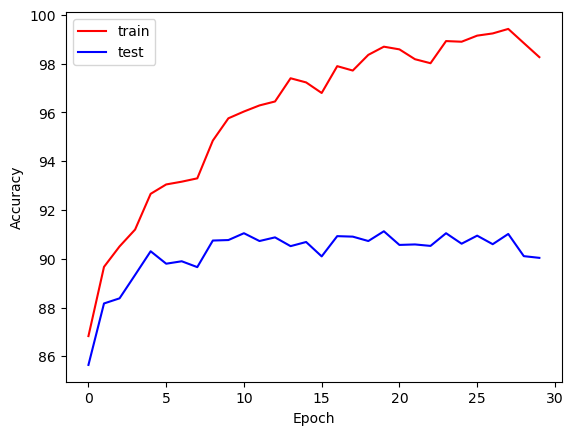

In [32]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracy, "r")
plt.plot(test_accuracy, "b")
plt.gca().legend(('train','test'))

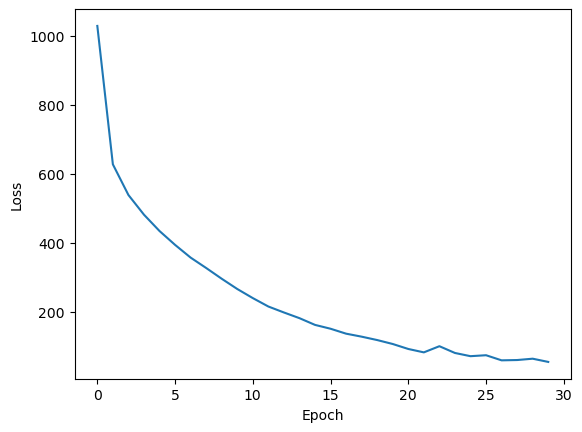

In [33]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_epoch_array)

3. Run three experiments each time changing all the current activation functions to one of the
   following: Tanh, Sigmoid and ELU. In your report, provide only the final classification accuracy
   values (train and test) per activation function and comment on the result.

In [11]:
#Reference of the code is taken from lab 7
# Experiment 1 = Tanh Activation Function
# CNN implementation

class MyCNNTanh(nn.Module):
  def __init__(self):
    super(MyCNNTanh, self).__init__()
    
    # Sequential container to run layers sequentially
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5, stride=1), nn.Tanh(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5, stride = 1), nn.Tanh(), nn.MaxPool2d(2, stride = 2))
    # Sequential container to run layers sequentially
    #Activation function used here is Tanh
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.Tanh(), nn.Linear(1024,256), nn.Tanh(), nn.Linear(256, 10))
   
  def forward(self, x):  
    x = self.cnn_model(x) 
    x =x.view(x.size(0), -1)
    x = self.fc_model(x) 
    return x

In [12]:
#Reference of the code is taken from lab 7

device = torch.device("cuda:0")
alpha = 0.1
net = MyCNNTanh().to(device)
# initialise weights
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 869.0992540046573, train accuracy: 88.00666666666666, test accuracy:86.96
Epoch 2: loss: 589.721349786967, train accuracy: 87.7, test accuracy:86.24
Epoch 3: loss: 498.35873060673475, train accuracy: 91.215, test accuracy:88.84
Epoch 4: loss: 433.65195075795054, train accuracy: 93.3, test accuracy:90.21
Epoch 5: loss: 378.5482244985178, train accuracy: 93.91833333333334, test accuracy:90.53
Epoch 6: loss: 334.16943960264325, train accuracy: 94.56833333333333, test accuracy:89.91
Epoch 7: loss: 287.905241609551, train accuracy: 94.88, test accuracy:90.32
Epoch 8: loss: 250.78925806004554, train accuracy: 96.77333333333333, test accuracy:91.08
Epoch 9: loss: 212.37989774835296, train accuracy: 96.70166666666667, test accuracy:90.3
Epoch 10: loss: 179.0241628800286, train accuracy: 97.31333333333333, test accuracy:91.0
Epoch 11: loss: 149.76604526874144, train accuracy: 97.54833333333333, test accuracy:90.54
Epoch 12: loss: 123.43984382250346, train accuracy: 98.34166666666

In [22]:
# Experiment 2 = Sigmoid Activation Function

#Reference of the code is taken from lab 7
# CNN implementation

class MyCNNSigmoid(nn.Module):
  def __init__(self):
    super(MyCNNSigmoid, self).__init__()
    
    # Sequential container to run layers sequentially
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5, stride=1), nn.Sigmoid(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5, stride = 1), nn.Sigmoid(), nn.MaxPool2d(2, stride = 2))
    # Sequential container to run layers sequentially
    #Activation function used here is sigmoid
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.Sigmoid(), nn.Linear(1024,256), nn.Sigmoid(), nn.Linear(256, 10))
   
  def forward(self, x):  
    x = self.cnn_model(x) 
    x =x.view(x.size(0), -1)
    x = self.fc_model(x) 
    return x

In [23]:
device = torch.device("cuda:0")
alpha = 0.1
net = MyCNNSigmoid().to(device)
# initialise weights
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 4340.566661834717, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 4316.939216136932, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: 2519.525271832943, train accuracy: 64.13166666666666, test accuracy:63.22
Epoch 4: loss: 1418.8998492658138, train accuracy: 73.98333333333333, test accuracy:73.24
Epoch 5: loss: 1231.1731787919998, train accuracy: 75.985, test accuracy:75.47
Epoch 6: loss: 1120.9488228857517, train accuracy: 76.97, test accuracy:76.15
Epoch 7: loss: 1029.0738906934857, train accuracy: 81.08666666666667, test accuracy:80.04
Epoch 8: loss: 956.0006580799818, train accuracy: 81.81333333333333, test accuracy:80.72
Epoch 9: loss: 896.2824197933078, train accuracy: 82.57833333333333, test accuracy:81.41
Epoch 10: loss: 849.6724303364754, train accuracy: 83.665, test accuracy:82.36
Epoch 11: loss: 807.7671908065677, train accuracy: 84.50333333333333, test accuracy:83.23
Epoch 12: loss: 770.2451561763883, train accuracy: 85.66833333333334, test ac

In [34]:
# Experiment 3 = ELU Activation Function

#Reference of the code is taken from lab 7
# CNN implementation

class MyCNNELU(nn.Module):
  def __init__(self):
    super(MyCNNELU, self).__init__()
    
    # Sequential container to run layers sequentially
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5, stride=1), nn.ELU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5, stride = 1), nn.ELU(), nn.MaxPool2d(2, stride = 2))
    # Sequential container to run layers sequentially
    #Activation function used here is ELU
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ELU(), nn.Linear(1024,256), nn.ELU(), nn.Linear(256, 10))
   
  def forward(self, x):  
    x = self.cnn_model(x) 
    x =x.view(x.size(0), -1)
    x = self.fc_model(x) 
    return x

In [35]:
#Reference of the code is taken from lab 7
device = torch.device("cuda:0")
alpha = 0.1
net = MyCNNELU().to(device)
# initialise weights
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 859.137964732945, train accuracy: 88.045, test accuracy:86.99
Epoch 2: loss: 588.5322065334767, train accuracy: 86.525, test accuracy:84.88
Epoch 3: loss: 504.89693420752883, train accuracy: 90.225, test accuracy:88.09
Epoch 4: loss: 446.38396453112364, train accuracy: 92.74666666666667, test accuracy:90.0
Epoch 5: loss: 396.5331344231963, train accuracy: 93.47, test accuracy:90.21
Epoch 6: loss: 357.11036853771657, train accuracy: 94.33, test accuracy:90.2
Epoch 7: loss: 317.90856459224597, train accuracy: 94.015, test accuracy:89.83
Epoch 8: loss: 286.0878362618387, train accuracy: 95.945, test accuracy:90.92
Epoch 9: loss: 250.68800823949277, train accuracy: 95.925, test accuracy:90.12
Epoch 10: loss: 226.75734227872454, train accuracy: 95.32333333333334, test accuracy:89.55
Epoch 11: loss: 208.42579775763443, train accuracy: 97.11833333333334, test accuracy:90.66
Epoch 12: loss: 187.29173794698727, train accuracy: 96.99333333333334, test accuracy:90.23
Epoch 13: loss

4.	Keeping ReLU, use 5 different learning rates: 0.001, 0.1, 0.5, 1, 10. In your report, provide the train loss, as well as the accuracy values for both train and test for each learning rate and comment on the trade-offs between speed and stability of convergence. Comment on why you get the Nan loss if any?

In [17]:
#Reference of the code is taken from lab 7
# Alpha = 0.001
alpha = 0.001
net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 3097.664202809334, train accuracy: 66.745, test accuracy:66.08
Epoch 2: loss: 1536.1005141735077, train accuracy: 71.10833333333333, test accuracy:70.79
Epoch 3: loss: 1331.5184233486652, train accuracy: 74.93833333333333, test accuracy:74.08
Epoch 4: loss: 1228.571806371212, train accuracy: 77.10333333333334, test accuracy:75.64
Epoch 5: loss: 1155.7128376066685, train accuracy: 76.385, test accuracy:75.4
Epoch 6: loss: 1097.9402548372746, train accuracy: 78.65666666666667, test accuracy:77.2
Epoch 7: loss: 1051.5402376502752, train accuracy: 79.75666666666666, test accuracy:79.12
Epoch 8: loss: 1011.5404888391495, train accuracy: 80.55333333333333, test accuracy:79.14
Epoch 9: loss: 976.6106134951115, train accuracy: 80.45666666666666, test accuracy:79.66
Epoch 10: loss: 945.8168675154448, train accuracy: 82.30166666666666, test accuracy:81.32
Epoch 11: loss: 920.2375957816839, train accuracy: 83.01833333333333, test accuracy:82.11
Epoch 12: loss: 894.4687532633543, tr

In [37]:
#Reference of the code is taken from lab 7
# Alpha = 0.1
alpha = 0.1
# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 62.36785382498172, train accuracy: 99.04333333333334, test accuracy:90.5
Epoch 2: loss: 51.14758794102736, train accuracy: 99.085, test accuracy:90.33
Epoch 3: loss: 50.76493678791826, train accuracy: 99.185, test accuracy:90.3
Epoch 4: loss: 48.49699444322758, train accuracy: 99.25833333333334, test accuracy:90.64
Epoch 5: loss: 42.1256006947726, train accuracy: 99.495, test accuracy:90.76
Epoch 6: loss: 66.45972536305514, train accuracy: 98.96666666666667, test accuracy:90.54
Epoch 7: loss: 82.87718326274495, train accuracy: 99.33333333333333, test accuracy:90.66
Epoch 8: loss: 83.27574196399222, train accuracy: 99.41166666666666, test accuracy:90.79
Epoch 9: loss: 66.61632700578808, train accuracy: 99.465, test accuracy:90.96
Epoch 10: loss: 59.15163959520262, train accuracy: 99.16166666666666, test accuracy:90.76
Epoch 11: loss: 55.266499487563856, train accuracy: 99.36833333333334, test accuracy:90.78
Epoch 12: loss: 46.17744192004035, train accuracy: 98.875, test a

In [38]:
#Reference of the code is taken from lab 7
# Alpha = 0.5
alpha = 0.5
# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 75.64937260846794, train accuracy: 99.285, test accuracy:90.62
Epoch 2: loss: 58.446948435971166, train accuracy: 99.35, test accuracy:90.54
Epoch 3: loss: 75.2563967180316, train accuracy: 99.40666666666667, test accuracy:90.35
Epoch 4: loss: 82.62852734400276, train accuracy: 99.04833333333333, test accuracy:90.32
Epoch 5: loss: 84.20930666200805, train accuracy: 99.22333333333333, test accuracy:89.99
Epoch 6: loss: 71.7353225398642, train accuracy: 99.195, test accuracy:90.22
Epoch 7: loss: 72.01276135268692, train accuracy: 99.40166666666667, test accuracy:89.82
Epoch 8: loss: 44.10445178216519, train accuracy: 99.405, test accuracy:90.4
Epoch 9: loss: 90.69151085734342, train accuracy: 99.335, test accuracy:90.36
Epoch 10: loss: 85.62203265346317, train accuracy: 98.815, test accuracy:89.7
Epoch 11: loss: 65.52366413132722, train accuracy: 98.80166666666666, test accuracy:89.62
Epoch 12: loss: 118.90218218604693, train accuracy: 99.11666666666666, test accuracy:90.1

In [39]:
#Reference of the code is taken from lab 7
# Alpha = 1
alpha = 1
# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 58.4214031965255, train accuracy: 99.43666666666667, test accuracy:90.47
Epoch 2: loss: 78.78198886776124, train accuracy: 99.32, test accuracy:90.62
Epoch 3: loss: 110.42309719791388, train accuracy: 98.135, test accuracy:89.7
Epoch 4: loss: 113.62407173517242, train accuracy: 99.36833333333334, test accuracy:90.29
Epoch 5: loss: 90.35753999234316, train accuracy: 99.325, test accuracy:90.26
Epoch 6: loss: 107.43525842928196, train accuracy: 97.94, test accuracy:89.35
Epoch 7: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 14: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 15: loss: na

In [40]:
#Reference of the code is taken from lab 7
# Alpha = 10
alpha = 10
# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 4: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 5: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 6: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 7: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 14: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 15: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 16: loss: nan, train accuracy: 10.0, test accuracy:10.0
Epoch 17: loss: n

5.	Add a dropout of 0.3 rate on the second fully connected layer (keeping ReLU and learning rate 0.1). In your report, provide the train and test accuracy values and explain how does the dropout affect the performance

In [15]:
#Reference of the code is taken from lab 7
# CNN implementation with dropout 0.3 at second FC
class MyCNNWithDropout(nn.Module):
  def __init__(self):
    super(MyCNNWithDropout, self).__init__()
    
    # Sequential container to run layers sequentially
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5, stride = 1), nn.ReLU(), nn.MaxPool2d(2, stride = 2))
    # Sequential container to run layers sequentially
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(),nn.Dropout(0.3), nn.Linear(256, 10))
   
  def forward(self, x):  
    # pass input via the CNN layers
    x = self.cnn_model(x)
    
    x =x.view(x.size(0), -1)
    
    # pass input via the fully-connected layers
    x = self.fc_model(x)
    
    return x

In [16]:
#Reference of the code is taken from lab 7
alpha = 0.1
net = MyCNNWithDropout().to(device)
# initialise weights
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

# loop over epochs
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader,0):
    net.train()
    #get data
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm 
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()
  
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 1032.7656307742, train accuracy: 86.50666666666666, test accuracy:85.6
Epoch 2: loss: 640.0994782820344, train accuracy: 89.60666666666667, test accuracy:88.51
Epoch 3: loss: 550.7181375175714, train accuracy: 90.51666666666667, test accuracy:89.0
Epoch 4: loss: 496.8086807448417, train accuracy: 91.57333333333334, test accuracy:89.46
Epoch 5: loss: 452.3392140669748, train accuracy: 92.25333333333333, test accuracy:89.97
Epoch 6: loss: 414.0068870363757, train accuracy: 93.14833333333333, test accuracy:90.37
Epoch 7: loss: 377.5466530052945, train accuracy: 92.895, test accuracy:90.07
Epoch 8: loss: 348.42580162175, train accuracy: 94.16166666666666, test accuracy:90.48
Epoch 9: loss: 317.94797830376774, train accuracy: 94.575, test accuracy:90.97
Epoch 10: loss: 288.28482929989696, train accuracy: 93.48166666666667, test accuracy:89.15
Epoch 11: loss: 267.2504729353823, train accuracy: 95.48, test accuracy:91.04
Epoch 12: loss: 246.8124089697376, train accuracy: 96.093